# Explore here

# Análisis exploratorio de datos de Airbnb en Nueva York.

## Paso 1
### Importamos el conjunto de datos

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




data_airbnb = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
print(data_airbnb.head())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

## Paso 2.
### Exploración y limpieza de datos.

In [2]:
data_airbnb.shape

(48895, 16)

En el archivo nos encontramos con 48895 filas con 16 columnas.

In [3]:
data_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

- Existen 48895 filas y 16 columnas.
- El objetivo clase a predecir lo tenemos entre las columnas y sería "price".
- Las variables "reviews_per_month " y "last_review" cuentan con 38843 valores no nulos, por lo que faltan en torno a 10000 resultados. Mientras que en las variables "host_name" y "name" apenas faltan unos 20 valores.
- El resto de variables están completas.
- Los datos tienen 10 características numéricas y 6 características categóricas.

### Eliminar duplicados.

In [4]:
data_airbnb.drop("id", axis = 1).duplicated().sum()

np.int64(0)

### Eliminamos información irrelevante


In [5]:
data_airbnb.drop(["id", "name", "latitude", "longitude", "host_name", "host_id", "last_review", "reviews_per_month"], axis = 1, inplace = True)
data_airbnb.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


En este caso, para el análisis de la característica "price" decidimos eliminar las columnas: "id", "name", "latitude", "longitude", "host_name". Porque las consideramos irrelevantes para esta característica.

Las variables "reviews_per_month " y "last_review", se ven reflejadas en "number_of_reviews" por lo que las eliminamos también.


## Paso 3
### Análisis de variables univariantes
#### Análisis sobre variables categóricas

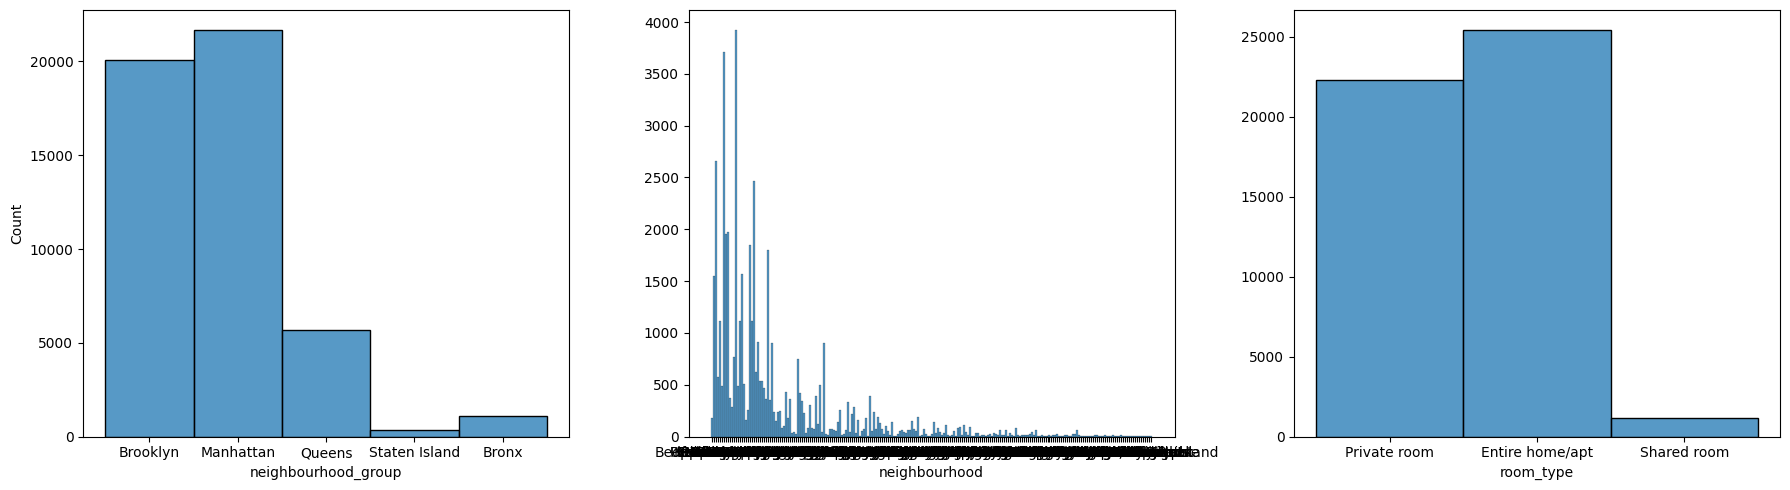

In [6]:
fig, axis = plt.subplots(1, 3, figsize = (18,5))

# Creamos un histograma múltiple de variables categóricas.
sns.histplot(ax = axis[0], data = data_airbnb, x = "neighbourhood_group").set()
sns.histplot(ax = axis[1], data = data_airbnb, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[2], data = data_airbnb, x = "room_type").set(ylabel = None)

# Ajustamos el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


- En la primera gráfica de "neighbourhood_group" se aprecia la clara tendencia por los barrios de Brooklyn y Manhattan, mientras que muy por debajo aparecerían Queens, Bronx y Staten Island en orden descendente.
- La segunda gráfica no obtenemos valores de interés por la cantidad de barrios diferentes que aparecen, imposible de mostrar en una gráfica.
- Finalmente la tercerta gráfica "room_type", las opciones de apartamento y habitación privada copan casi la totalidad de alquileres frente a algunos datos de habitación compartida.

#### Análisis sobre variables numéricas.

<Axes: xlabel='availability_365'>

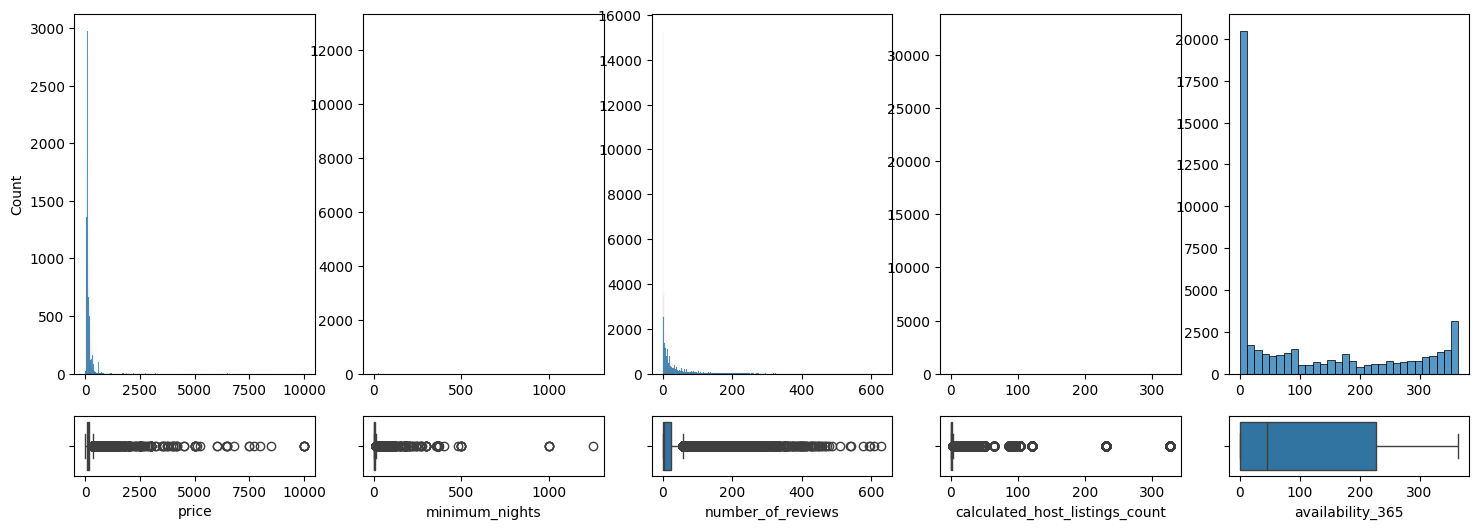

In [7]:
fig, axis = plt.subplots(2, 5, figsize = (18, 6), gridspec_kw = {"height_ratios": [6, 1]})

# Crea una figura de múltiples histogramas y diagramas de caja
sns.histplot(ax = axis[0,0], data = data_airbnb, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1,0], data = data_airbnb, x = "price")
sns.histplot(ax = axis[0,1], data = data_airbnb, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,1], data = data_airbnb, x = "minimum_nights")
sns.histplot(ax = axis[0,2], data = data_airbnb, x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,2], data = data_airbnb, x = "number_of_reviews")
sns.histplot(ax = axis[0,3], data = data_airbnb, x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,3], data = data_airbnb, x = "calculated_host_listings_count")
sns.histplot(ax = axis[0,4], data = data_airbnb, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1,4], data = data_airbnb, x = "availability_365")


## Paso 4
### Análisis de variables multivariantes
#### Análisis numérico-numérico

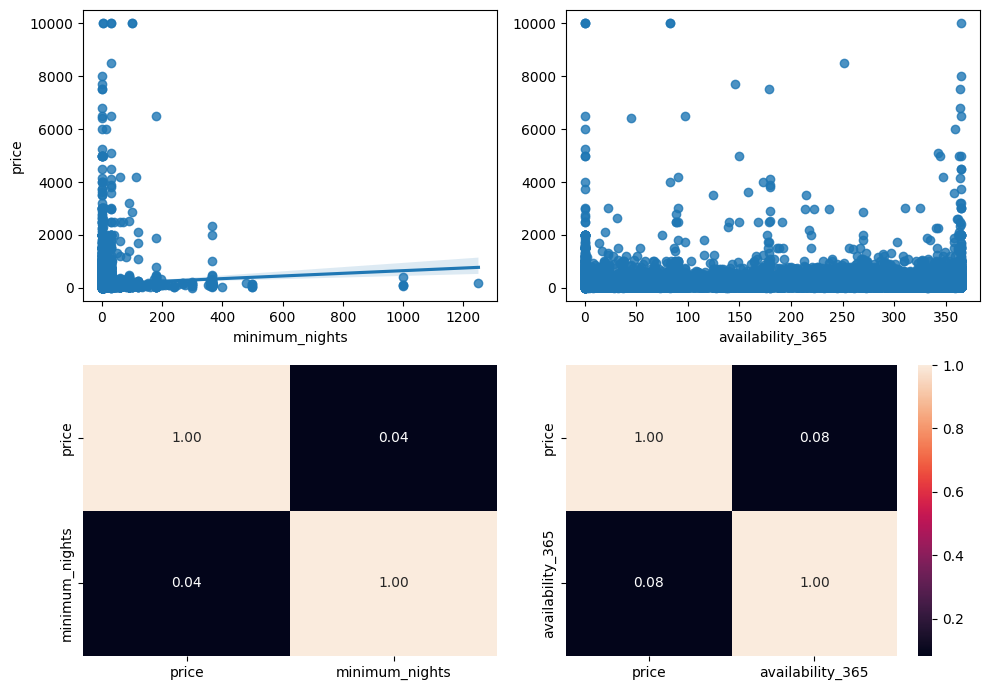

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "minimum_nights", y = "price")
sns.heatmap(data_airbnb[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "availability_365", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

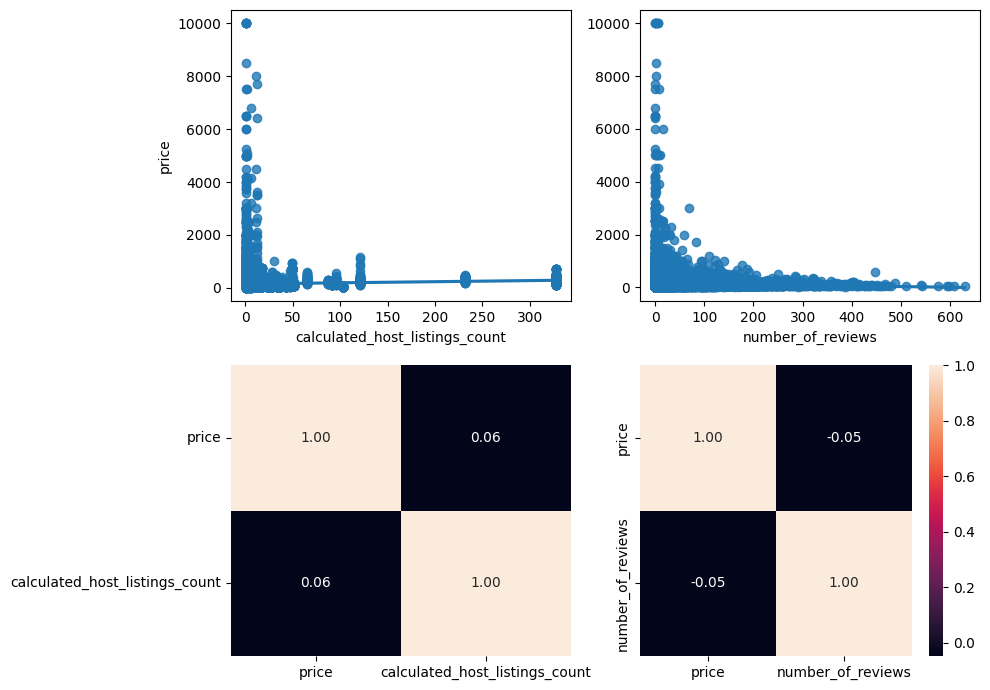

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_airbnb, x = "calculated_host_listings_count", y = "price")
sns.heatmap(data_airbnb[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_airbnb, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(data_airbnb[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

#### Análisis categórico-categórico

In [14]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.countplot(ax = axis[0], data = data_airbnb, x = "neighbourhood_group", hue = "price")
sns.countplot(ax = axis[1], data = data_airbnb, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[2], data = data_airbnb, x = "room_type", hue = "price").set(ylabel = None)


plt.tight_layout()


plt.show()

KeyboardInterrupt: 